In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [2]:
# Define base distribution

normal = tfd.Normal(loc=0, scale=1)

In [3]:
# Sample from base distribution

n = 1000
z = normal.sample(n)

### Scale and shift bijector

In [4]:
# Define scale and shift

scale=4.7
shift=7

In [7]:
# Define chain bijector

scale_and_shift = tfb.Chain([
    tfb.Shift(shift),
    tfb.Scale(scale)]
)

In [9]:
# We can also use call methods

scale_transf = tfb.Scale(scale)
shift_transf = tfb.Shift(shift)
scale_and_shift = shift_transf(scale_transf)

In [10]:
# Apply the forward transformation

x = scale_and_shift.forward(z)

In [11]:
# Check the forward transformation

tf.norm(x - (scale*z + shift))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

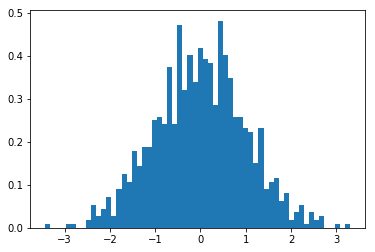

In [13]:
# Plot z density

plt.hist(z, bins=60, density=True)
plt.show()

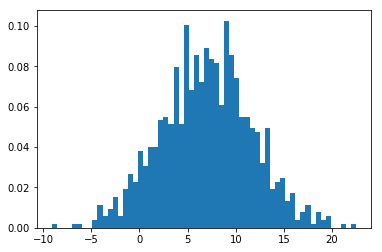

In [14]:
# Plot x density

plt.hist(x, bins=60, density=True)
plt.show()

#### Inverse transformation

In [15]:
# Apply inverse transformation

inv_x = scale_and_shift.inverse(x)

In [16]:
# Check inverse transformation

tf.norm(inv_x - z)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [17]:
# Compute log prob for x

log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z, event_ndims=0)
print(log_prob_x)

tf.Tensor(
[-2.7731166 -2.7369246 -2.4728765 -3.0177507 -2.471167  -3.2962475
 -3.1388855 -3.3063478 -2.7906885 -2.553512  -4.295815  -2.6081483
 -2.5844183 -2.4800553 -2.4851491 -2.6990705 -4.382518  -2.600793
 -3.3509636 -4.0115304 -2.8044586 -2.700368  -2.5811906 -2.542953
 -2.5683079 -3.53032   -2.7347364 -2.6019063 -3.6297479 -3.4688995
 -2.555308  -2.4750657 -3.7699232 -2.482385  -2.8005328 -2.507554
 -2.7034101 -3.3716035 -2.8418975 -4.83598   -3.2090344 -2.9323673
 -2.5068982 -2.5608387 -4.7035904 -2.7122788 -3.392313  -3.5297828
 -2.501964  -2.470705  -2.9184954 -2.4874296 -2.5844753 -2.5122385
 -2.6162977 -2.631738  -2.7211413 -2.5080624 -3.0466228 -3.913148
 -2.929503  -2.480227  -3.1202905 -3.0959005 -3.2435136 -2.9508405
 -2.576546  -2.5884361 -2.4873302 -2.4667394 -2.6222835 -2.478574
 -2.4682941 -2.4685488 -2.5718203 -2.5376616 -3.8331194 -5.453771
 -2.7585497 -2.5224276 -2.7783842 -2.5777104 -2.5528522 -4.3641872
 -2.7742784 -3.0888886 -2.5878568 -2.6202233 -3.4009686 -

In [18]:
# We can also use the inverse transformation

log_prob_x = (normal.log_prob(scale_and_shift.inverse(x))) + scale_and_shift.inverse_log_det_jacobian(x, event_ndims=0)
print(log_prob_x)

tf.Tensor(
[-2.7731166 -2.7369246 -2.4728765 -3.0177507 -2.471167  -3.2962475
 -3.1388855 -3.3063478 -2.7906885 -2.553512  -4.295815  -2.6081483
 -2.5844183 -2.4800553 -2.4851491 -2.6990705 -4.382518  -2.600793
 -3.3509636 -4.0115304 -2.8044586 -2.700368  -2.5811906 -2.542953
 -2.5683079 -3.53032   -2.7347364 -2.6019063 -3.6297479 -3.4688995
 -2.555308  -2.4750657 -3.7699232 -2.482385  -2.8005328 -2.507554
 -2.7034101 -3.3716035 -2.8418975 -4.83598   -3.2090344 -2.9323673
 -2.5068982 -2.5608387 -4.7035904 -2.7122788 -3.392313  -3.5297828
 -2.501964  -2.470705  -2.9184954 -2.4874296 -2.5844753 -2.5122385
 -2.6162977 -2.631738  -2.7211413 -2.5080624 -3.0466228 -3.913148
 -2.929503  -2.480227  -3.1202905 -3.0959005 -3.2435136 -2.9508405
 -2.576546  -2.5884361 -2.4873302 -2.4667394 -2.6222835 -2.478574
 -2.4682941 -2.4685488 -2.5718203 -2.5376616 -3.8331194 -5.453771
 -2.7585497 -2.5224276 -2.7783842 -2.5777104 -2.5528522 -4.3641872
 -2.7742784 -3.0888886 -2.5878568 -2.6202233 -3.4009686 -

### Broadcasting

In [19]:
x = tf.random.normal(shape=(100, 1))

In [21]:
# Softfloor bijector

softfloor = tfb.Softfloor(temperature=0.01)
y = softfloor.forward(x)
print(y.shape)

(100, 1)


In [22]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature = [0.2, 1.])
y = softfloor.forward(x)
print(y.shape)

(100, 2)


In [23]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature=[0.01, 0.1, 1.])

In [24]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

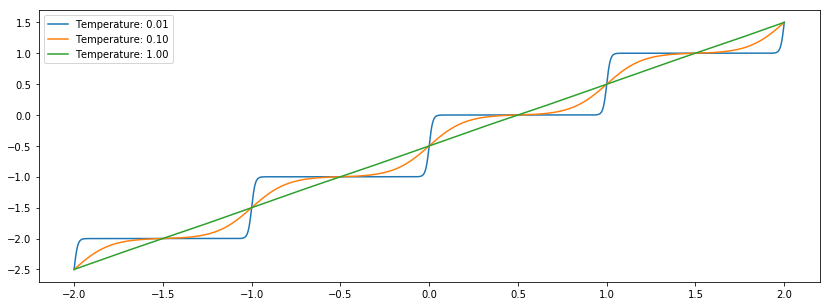

In [27]:
# Plot

x = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(3, softfloor, ['temperature'], x)

In [28]:
# Gumbel bijector using broadcasting

exps = tfb.GumbelCDF(loc = [0.5, 1., 1.5, 2.,3.], scale=[1, 2, 2, 3, 4])

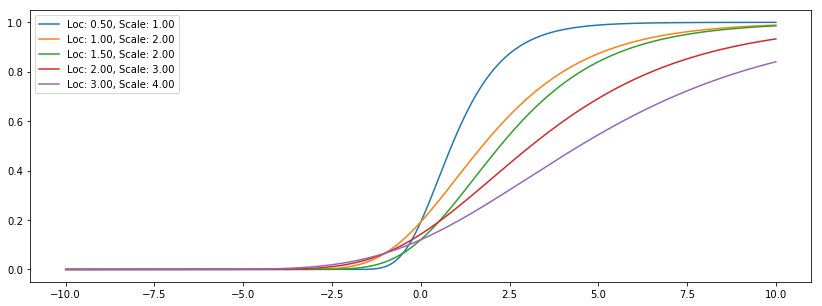

In [32]:
# Plot

x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(3, exps, ['loc', 'scale'], x)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [33]:
# Parameters

n = 10000
loc = 0
scale = 0.5

In [34]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)

In [35]:
# Display event and batch shape

print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [37]:
# Exponential bijector

exp = tfb.Exp()

In [40]:
# Log normal transformed distribution using exp and normal bijectors

log_normal_td = exp(normal)

In [41]:
# Display event and batch shape

print("batch shape ", log_normal_td.batch_shape)
print("event shape ", log_normal_td.event_shape)

batch shape  ()
event shape  ()


In [42]:
# Base distribution

z = normal.sample(n)

#### Plots

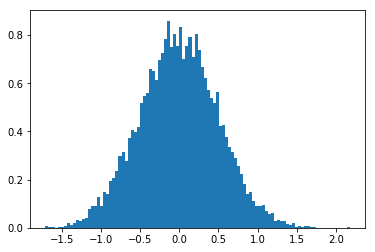

In [43]:
# Plot z density

plt.hist(z, bins =100, density=True)
plt.show()

In [44]:
# Transformed distribution

x = log_normal_td.sample(n)

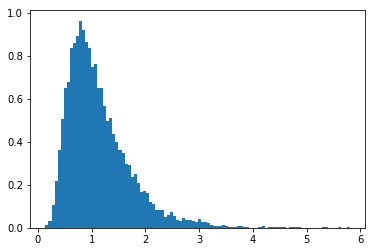

In [45]:
# Plot x density

plt.hist(x, bins =100, density=True)
plt.show()

In [49]:
# Define log normal distribution

log_normal = tfd.LogNormal(loc=loc, scale=scale)

In [50]:
# Sample log_normal

l = log_normal.sample(n)

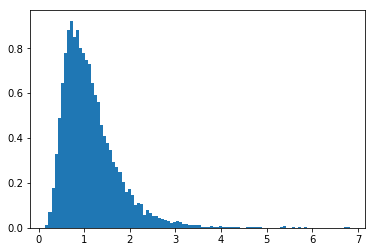

In [51]:
# Plot l density

plt.hist(l, bins =100, density=True)
plt.show()

#### Log probability

In [52]:
# Log prob of LogNormal

log_prob = log_normal.log_prob(x)

In [53]:
# Log prob of log normal transformed distribution

log_prob_td = log_normal_td.log_prob(x)

In [54]:
# Check log probs

tf.norm(log_prob - log_prob_td)

<tf.Tensor: shape=(), dtype=float32, numpy=7.0952065e-06>

### Event shape and batch shape

In [55]:
# Set a scaling lower triangular matrix

tril = tf.random.normal((2, 4, 4))
scale_low_tri = tf.linalg.LinearOperatorLowerTriangular(tril)

In [56]:
# View of scale_low_tri

scale_low_tri.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[-1.0540446 ,  0.        ,  0.        ,  0.        ],
        [ 0.83878523,  1.0147169 ,  0.        ,  0.        ],
        [-1.1036118 ,  2.5226614 ,  2.459337  ,  0.        ],
        [ 0.19120802, -0.59501976, -2.5108573 ,  0.910191  ]],

       [[ 0.0322422 ,  0.        ,  0.        ,  0.        ],
        [ 0.30038193,  0.49066055,  0.        ,  0.        ],
        [ 0.47742438, -0.7010176 , -0.51235783,  0.        ],
        [ 0.14205858, -1.0401417 ,  0.20078021,  0.4391924 ]]],
      dtype=float32)>

In [57]:
# Define scale linear operator

scale_lin_op = tfb.ScaleMatvecLinearOperator(scale_low_tri)

In [58]:
# Define scale linear operator transformed distribution with a batch and event shape

mvn = tfd.TransformedDistribution(normal, scale_lin_op, batch_shape=[2], event_shape=[4])
print(mvn)

tfp.distributions.TransformedDistribution("scale_matvec_linear_operatorNormal", batch_shape=[2], event_shape=[4], dtype=float32)


In [59]:
# Display event and batch shape

print("batch shape ", mvn.batch_shape)
print("event shape ", mvn.event_shape)

batch shape  (2,)
event shape  (4,)


In [60]:
# Sample

y1 = mvn.sample(sample_shape=(n,))
print(y1.shape)

(10000, 2, 4)


In [61]:
# Define a MultivariateNormalLinearOperator distribution

mvn2 = tfd.MultivariateNormalLinearOperator(loc=0, scale = scale_low_tri)
print(mvn2)

tfp.distributions.MultivariateNormalLinearOperator("MultivariateNormalLinearOperator", batch_shape=[2], event_shape=[4], dtype=float32)


In [62]:
# Display event and batch shape

print("batch shape ", mvn2.batch_shape)
print("event shape ", mvn2.event_shape)

batch shape  (2,)
event shape  (4,)


In [64]:
# Sample

y2 = mvn2.sample(sample_shape=(n,))
print(y2.shape)

(10000, 2, 4)


In [65]:
# Check

xn = normal.sample((n, 2, 4))
tf.norm(mvn.log_prob(xn) - mvn2.log_prob(xn)) / tf.norm(mvn.log_prob(xn))


<tf.Tensor: shape=(), dtype=float32, numpy=0.7500483>

***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [67]:
# Define a new bijector: Cubic

class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0, name=name)
    def _forward(self, x):
        x = tf.cast(x, tf.float32)
        return tf.squeeze(tf.pow(self.a * x + self.b, 3))
    def _inverse(self, y):
        y = tf.cast(y, tf.float32)
        return (tf.math.sign(y) *  tf.pow(tf.abs(y), 1/3) - self.b) / self.a
    def _forward_log_det_jacobian(self, x):
        x = tf.cast(x, tf.float32)
        return tf.math.log(3. * tf.abs(self.a)) + 2. * tf.math.log(tf.abs(self.a * x + self.b))

In [69]:
# Cubic bijector

cubic = Cubic([1., -2.], [-1., 0.4], validate_args=True)

In [70]:
# Apply forward transformation

x = tf.constant([[1,2], [3,4]])
y = cubic.forward(x
                 )
print(y)

tf.Tensor(
[[   0.        -46.655994]
 [   8.       -438.97598 ]], shape=(2, 2), dtype=float32)


In [72]:
# Check inverse

np.linalg.norm(x - cubic.inverse(y))

0.0

#### Function plots

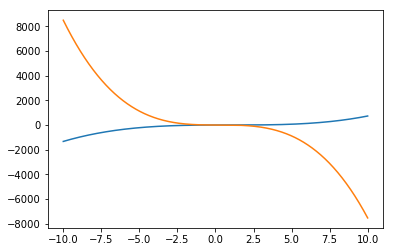

In [74]:
# Plot the forward transformation

x = np.linspace(-10, 10, 500).reshape(-1, 1)
plt.plot(x, cubic.forward(x))

In [75]:
# Display shape

print(cubic.forward(x).shape)

(500, 2)


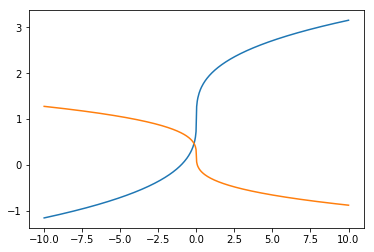

In [76]:
# Plot the inverse

plt.plot(x, cubic.inverse(x))

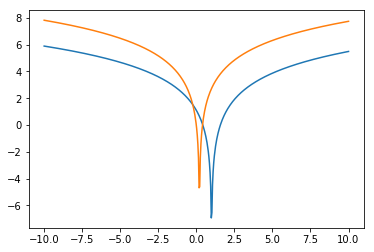

In [77]:
# Plot the forward log Jacobian determinant

plt.plot(x, cubic.forward_log_det_jacobian(x, event_ndims=0))

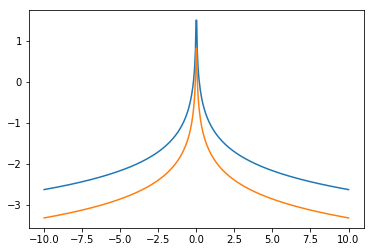

In [78]:
# Plot the inverse log Jacobian determinant

plt.plot(x, cubic.inverse_log_det_jacobian(x, event_ndims=0))

#### TransformedDistribution and plots

In [79]:
# Create a transformed distribution with Cubic

normal = tfd.Normal(loc=0, scale=1.)
cubed_normal = tfd.TransformedDistribution(normal, cubic, event_shape=[2])

In [80]:
# Sample cubed_normal

n = 1000
g = cubed_normal.sample(n)
g.shape

TensorShape([1000, 2])

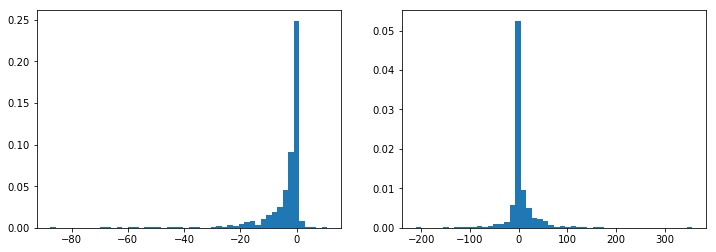

In [81]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

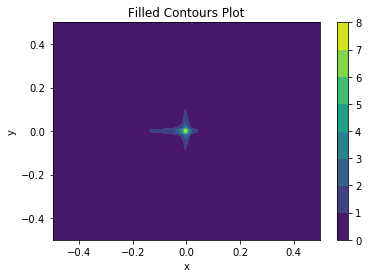

In [82]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [85]:
# Create a transformed distribution with the inverse of Cube

inverse_cubic = tfb.Invert(cubic)
inv_cubed_normal  = inverse_cubic(normal, event_shape=[2])

In [86]:
# Samble inv_cubed_normal

n = 1000
h = inv_cubed_normal.sample(n)
h.shape

TensorShape([1000, 2])

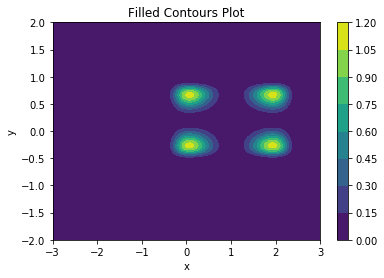

In [87]:
# Make contour plot

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

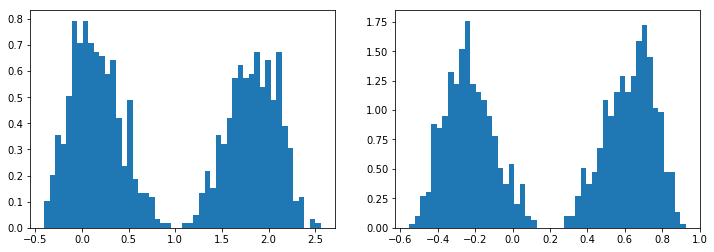

In [89]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(h[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(h[..., 1], bins=50, density=True)
plt.show()

#### Training the bijector

In [90]:
# Create a mixture of four Gaussians

probs = [0.45, 0.55]
mix_gauss = tfd.Mixture(
    cat = tfd.Categorical(probs=probs),
    components = [
        tfd.Normal(loc=2.3, scale=0.4),
        tfd.Normal(loc=0.0, scale=0.4)
    ]
)

In [91]:
# Create the dataset

x_train = mix_gauss.sample(10000)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


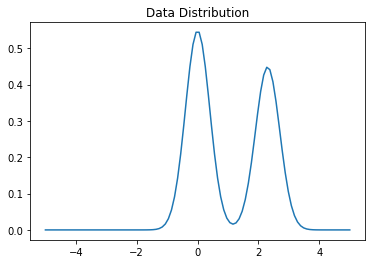

In [93]:
# Plot the data distribution

x = np.linspace(-5., 5., 100)
plt.plot(x, mix_gauss.prob(x))
plt.title("Data Distribution")
plt.show()

In [97]:
# Make a trainable bijector

trainable_inv_cubic = tfb.Invert(Cubic(
    tf.Variable(0.25), tf.Variable(-0.1)
))
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

In [98]:
# Make a trainable transformed distribution

trainable_dist = tfd.TransformedDistribution(normal, trainable_inv_cubic)


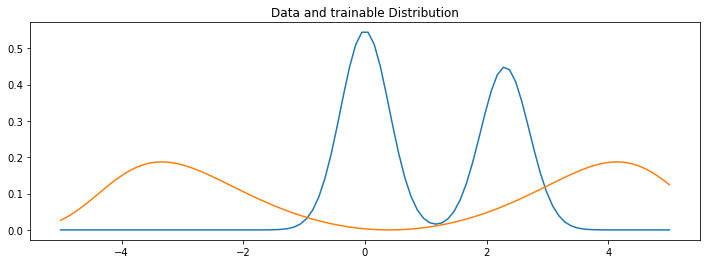

In [99]:
# Plot the data and learned distributions

x = np.linspace(-5., 5., 100)
plt.figure(figsize=(12, 4))
plt.plot(x, mix_gauss.prob(x), label='data')
plt.plot(x, trainable_dist.prob(x), label='trainable')
plt.title("Data and trainable Distribution")
plt.show()

In [104]:
# Train the bijector

num_epochs = 30
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print("Epoch {}...".format(epoch))
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...
Epoch 10...
Epoch 11...
Epoch 12...
Epoch 13...
Epoch 14...
Epoch 15...
Epoch 16...
Epoch 17...
Epoch 18...
Epoch 19...
Epoch 20...
Epoch 21...
Epoch 22...
Epoch 23...
Epoch 24...
Epoch 25...
Epoch 26...
Epoch 27...
Epoch 28...
Epoch 29...


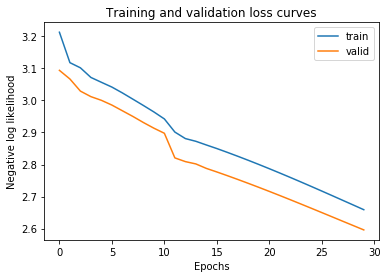

In [105]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

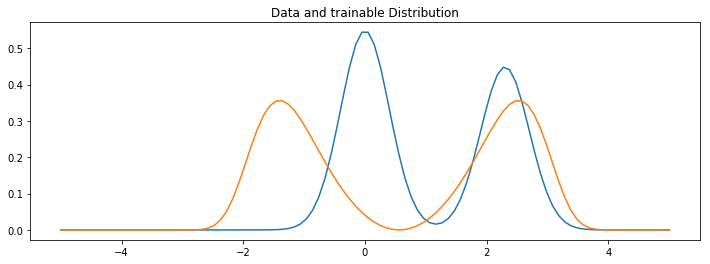

In [106]:
# Plot the data and learned distributions

x = np.linspace(-5., 5., 100)
plt.figure(figsize=(12, 4))
plt.plot(x, mix_gauss.prob(x), label='data')
plt.plot(x, trainable_dist.prob(x), label='trainable')
plt.title("Data and trainable Distribution")
plt.show()

In [107]:
# Display trainable variables

trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.47598198>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.2663618>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [109]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

(-2, 2)

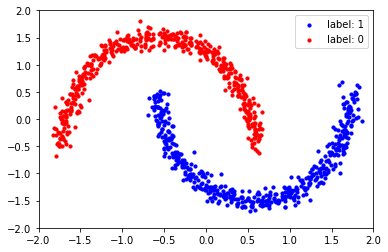

In [110]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [111]:
# Define base distribution

base_distribution = tfd.Normal(loc=0, scale=1)

In [114]:
# Define the trainable distribution

def make_masked_autoregressive_flow(hidden_units = [16, 16], activation='relu'):
    made = tfb.AutoregressiveNetwork(
        params=2, event_shape=[2], hidden_units = hidden_units, activation = activation
    )
    return tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)
trainable_distribution = tfd.TransformedDistribution(base_distribution, 
                                                     make_masked_autoregressive_flow(),
                                                    event_shape=[2]
                                                    )

In [115]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [116]:
# Define a plot contour routine

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

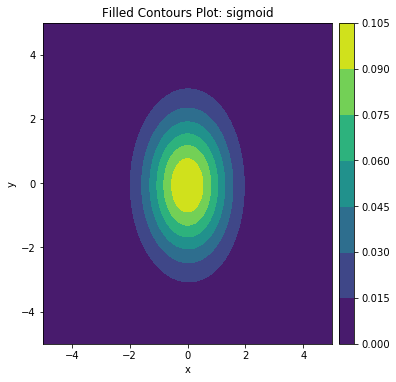

In [120]:
# Plot contour

activation = 'sigmoid'
maf = tfd.TransformedDistribution(
    base_distribution, 
    make_masked_autoregressive_flow(activation=activation),
    event_shape=[2]
)
plot_contour_prob([maf], scale_fig=6, title=[activation])

In [121]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [122]:
# Make samples

x = base_distribution.sample([1000, 2])
names= [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]

In [123]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

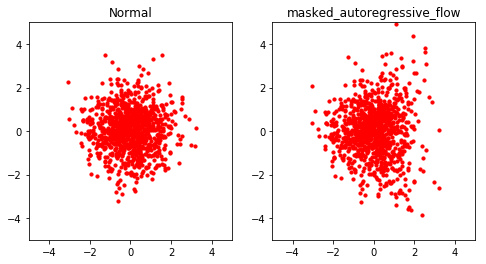

In [124]:
# Plot

_plot(samples)

#### Training a MaskedAutoregressiveFlow bijector

In [125]:
from tensorflow.keras.callbacks import LambdaCallback

In [126]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if epoch % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [127]:
# Train the distribution

history = train_dist_routine(trainable_distribution, n_epochs=600, n_disp=50)


 Epoch 1/600 
	 loss: 2.9226, val_loss: 2.8528

 Epoch 51/600 
	 loss: 2.7013, val_loss: 2.6685

 Epoch 101/600 
	 loss: 2.6509, val_loss: 2.6245

 Epoch 151/600 
	 loss: 2.6209, val_loss: 2.5954

 Epoch 201/600 
	 loss: 2.5798, val_loss: 2.5554

 Epoch 251/600 
	 loss: 2.5175, val_loss: 2.4941

 Epoch 301/600 
	 loss: 2.4234, val_loss: 2.3990

 Epoch 351/600 
	 loss: 2.3067, val_loss: 2.2863

 Epoch 401/600 
	 loss: 2.2015, val_loss: 2.2086

 Epoch 451/600 
	 loss: 2.1422, val_loss: 2.1708

 Epoch 501/600 
	 loss: 2.1039, val_loss: 2.1460

 Epoch 551/600 
	 loss: 2.0742, val_loss: 2.1248


In [128]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

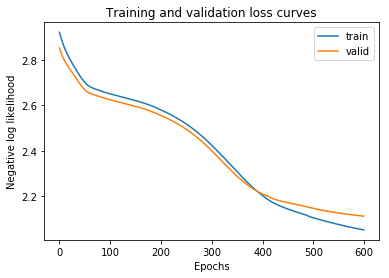

In [129]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [130]:
# Make samples


x = base_distribution.sample([1000, 2])
names= [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]

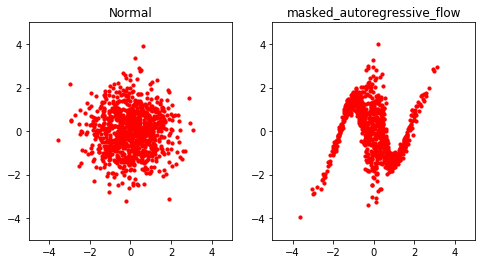

In [131]:
# Plot

_plot(samples)

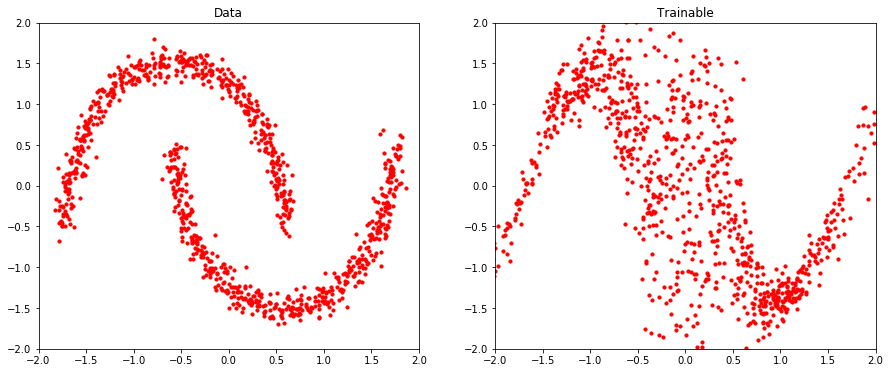

In [132]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

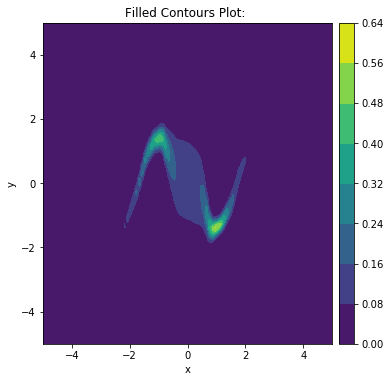

In [134]:
# Plot contour

plot_contour_prob([trainable_distribution], scale_fig=6)

#### Training a chain of MaskedAutoregressiveFlow bijectors

In [135]:
# Define a more expressive model

num_bijectors = 6
bijectors = []
for i in range(num_bijectors):
    masked_auto_i = make_masked_autoregressive_flow(hidden_units=[256, 256], activation='relu')
    bijectors.append(masked_auto_i)
    bijectors.append(tfb.Permute(permutation=[1, 0]))
flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))

In [136]:
# Define the trainable distribution

trainable_distribution = tfd.TransformedDistribution(
    distribution = base_distribution, 
    bijector=flow_bijector, 
    event_shape=[2]
)

In [137]:
# Make samples

def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

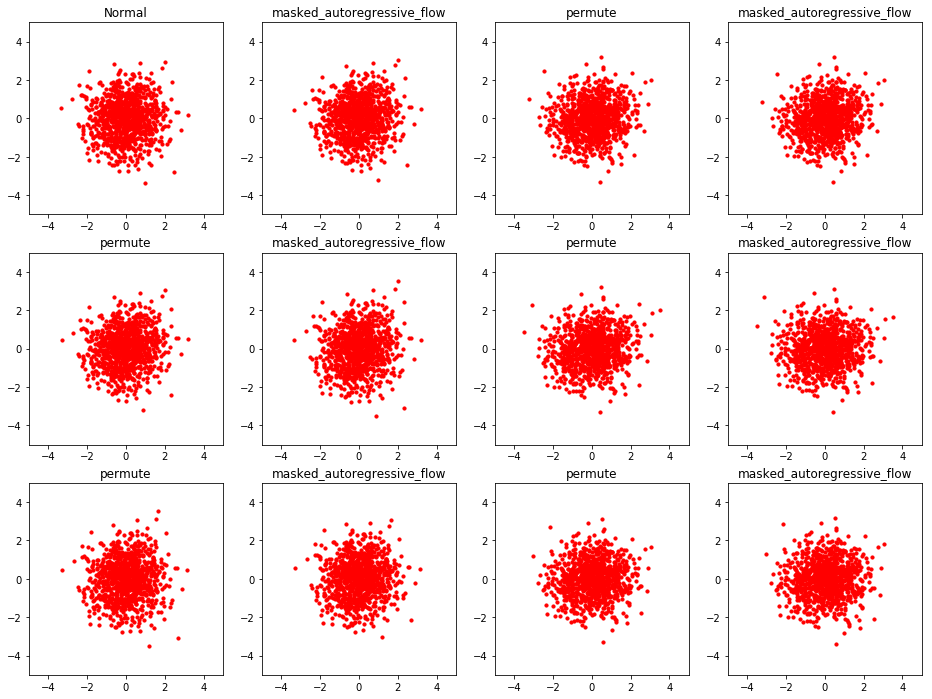

In [138]:
# Plot

_plot(samples, 3)

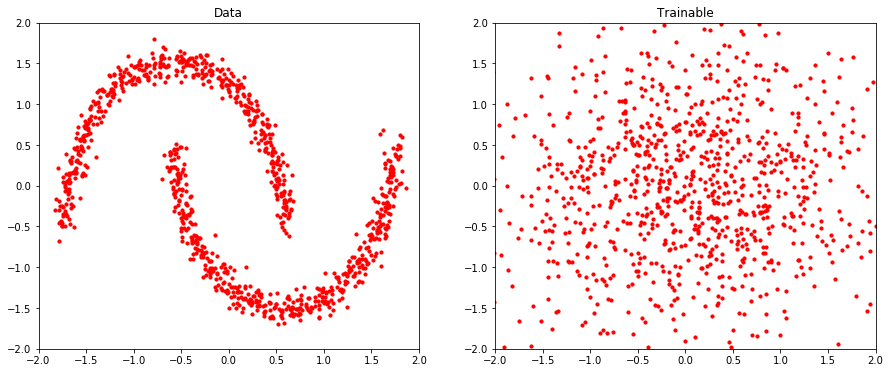

In [139]:
# Plot

visualize_training_data(samples)

In [141]:
# Train the distribution

history = train_dist_routine(
    trainable_distribution, n_epochs=600, n_disp=50
)


 Epoch 1/600 
	 loss: 2.8535, val_loss: 2.6542

 Epoch 51/600 
	 loss: 2.2387, val_loss: 2.7411

 Epoch 101/600 
	 loss: 2.1770, val_loss: 2.5981

 Epoch 151/600 
	 loss: 2.0184, val_loss: 2.1673

 Epoch 201/600 
	 loss: 1.8637, val_loss: 3.2005

 Epoch 251/600 
	 loss: 1.7861, val_loss: 2.2985

 Epoch 301/600 
	 loss: 1.6516, val_loss: 2.9597

 Epoch 351/600 
	 loss: 1.7411, val_loss: 2.4443

 Epoch 401/600 
	 loss: 1.5259, val_loss: 6695.9351

 Epoch 451/600 
	 loss: 1.4203, val_loss: 58876.8984

 Epoch 501/600 
	 loss: 1.3967, val_loss: 89255.6094

 Epoch 551/600 
	 loss: 1.3519, val_loss: 27307806.0000


In [145]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

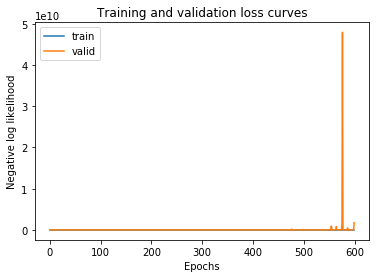

In [146]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

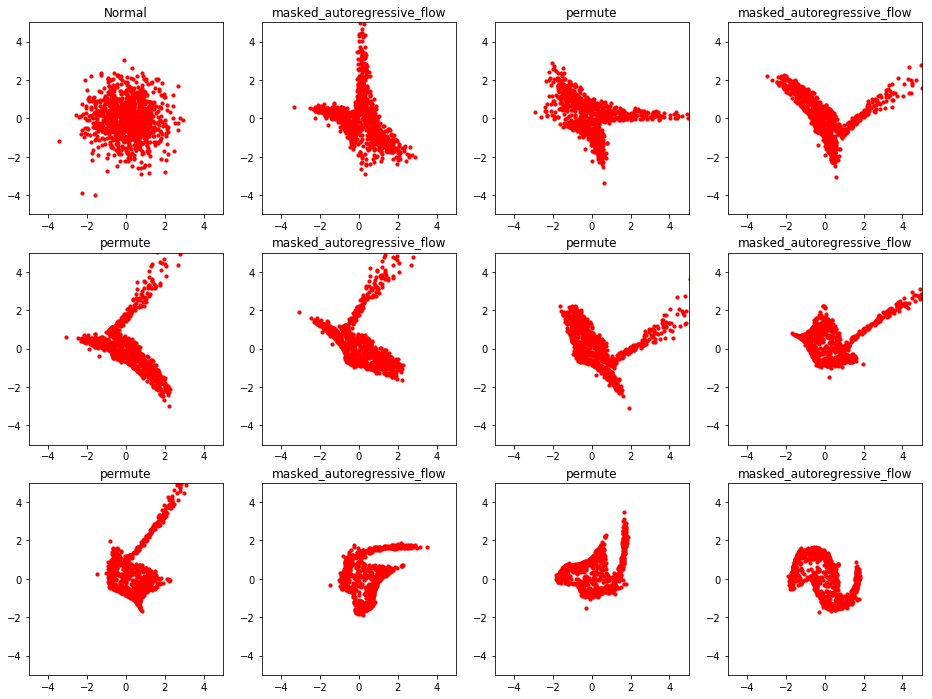

In [149]:
# Make samples and plot

names, samples = make_samples()
_plot(samples, 3)

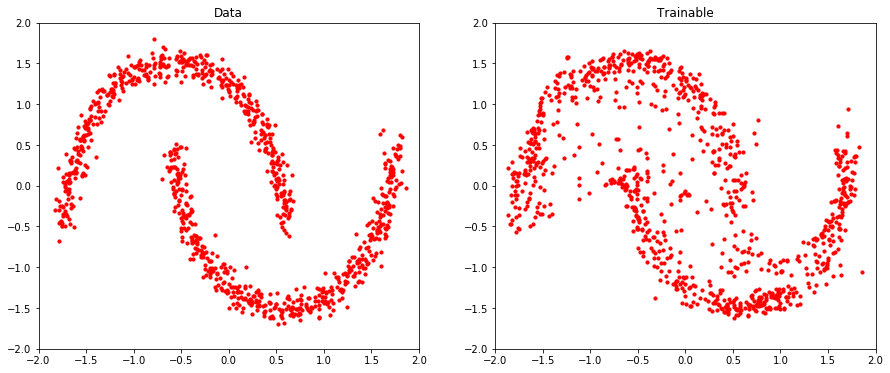

In [148]:
# Plot

visualize_training_data(samples)

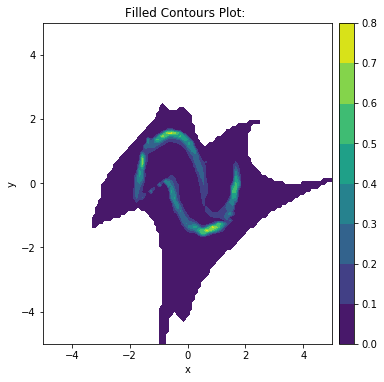

In [153]:
# Plot

plot_contour_prob([trainable_distribution], scale_fig=6)